The aim of this notebook is to show different ways to start exploring candlestick patterns. This notebook is designed to be implemented in Quantopian's research environment. More commentary on the code can be found on AAAQuant's Candlestick Pattern Study blog at aaaquants.com.

In [ ]:
import talib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from quantopian.pipeline.factors.morningstar import MarketCap
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
import seaborn as sns

# Exploratory Analysis

The plot below shows an instance where two long Doji signals are seen predicting Google's stock price changing from a downtrend into an uptrend.

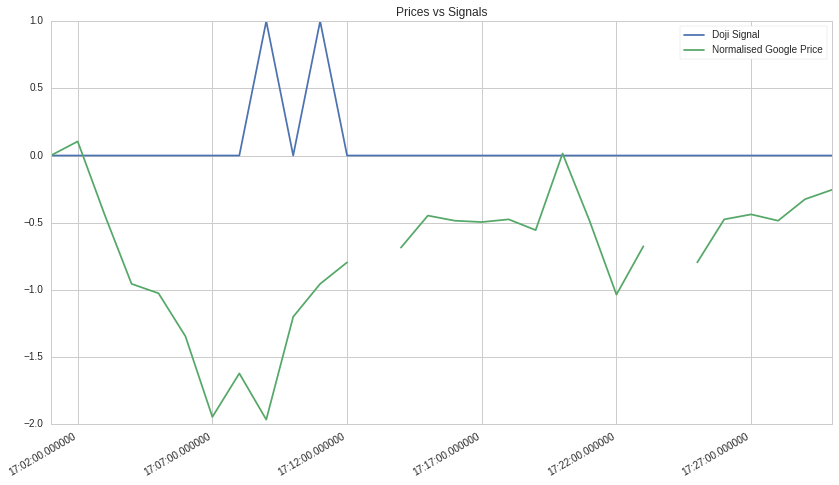

In [11]:
priceDf = get_pricing('GOOG','2017-01-01','2017-12-01',frequency='minute')

stockCandle = talib.CDLDOJI(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['close_price'])

ts = pd.Series(stockCandle,index=priceDf.index)

(ts/100.).iloc[150:180].plot(label='Doji Signal')
(priceDf['close_price'].iloc[150:180]-priceDf['close_price'].iloc[150]).plot(label='Normalised Google Price')
plt.legend()
plt.title('Prices vs Signals')

In [12]:
def make_pipeline(x):
    '''Create pipeline based on top x market cap'''
    mktCap = MarketCap()
    myMktCap = mktCap.top(x)
    pipe = Pipeline()
    pipe.set_screen(myMktCap)
    
    return pipe

In [13]:
def pipeline_output(x, d1):
    '''Run the pipeline and let user specify x market cap at certain date'''
    pipe = make_pipeline(x)
    myPipe = run_pipeline(pipe, start_date=d1, end_date=d1)
    
    return myPipe

In [14]:
def get_stocks(x, d1):
    '''Create list of stocks from multi index data frame for future analysis'''
    
    #Call the pipeline_output function and specify the market cap and date
    #myPipe is a  multi index dataframe with date and stocks as the indices
    myPipe = pipeline_output(x, d1)
    
    #Count the multi index to check there are correct number of stocks for the date. 
    #Assert will break the code if the number of stocks is incorrect.
    assert(myPipe.reset_index().groupby('level_0')['level_1'].nunique()[0] == x)
    
    #Extract stocks from second level of index
    #Iterate through stocks and create new list with just the symbols as strings from the index
    myStocks = myPipe.index.get_level_values(1)
    myStocks = [str(i.symbol) for i in myStocks]
    
    return myStocks

In [30]:
def get_all_indicators(priceDf):
    a = []
    try:
        a.append(talib.CDL2CROWS(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDL3BLACKCROWS(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDL3INSIDE(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDL3LINESTRIKE(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDL3OUTSIDE(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDL3STARSINSOUTH(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDL3WHITESOLDIERS(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLABANDONEDBABY(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLADVANCEBLOCK(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLBELTHOLD(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLBREAKAWAY(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLCLOSINGMARUBOZU(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLCONCEALBABYSWALL(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLCOUNTERATTACK(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLDARKCLOUDCOVER(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLDOJI(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLDOJISTAR(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLDRAGONFLYDOJI(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLENGULFING(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLEVENINGDOJISTAR(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLEVENINGSTAR(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLGAPSIDESIDEWHITE(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLGRAVESTONEDOJI(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLHAMMER(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLHANGINGMAN(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLHARAMI(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLHARAMICROSS(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLHIGHWAVE(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLHIKKAKE(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLHIKKAKEMOD(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLHOMINGPIGEON(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLIDENTICAL3CROWS(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLINNECK(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLINVERTEDHAMMER(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLKICKING(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLKICKINGBYLENGTH(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLLADDERBOTTOM(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLLONGLEGGEDDOJI(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLLONGLINE(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLMARUBOZU(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLMATCHINGLOW(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLMATHOLD(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLMORNINGDOJISTAR(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLMORNINGSTAR(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLONNECK(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLPIERCING(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLRICKSHAWMAN(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLRISEFALL3METHODS(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLSEPARATINGLINES(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLSHOOTINGSTAR(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLSHORTLINE(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLSPINNINGTOP(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLSTALLEDPATTERN(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLSTICKSANDWICH(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLTAKURI(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLTASUKIGAP(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLTHRUSTING(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLTRISTAR(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLUNIQUE3RIVER(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLUPSIDEGAP2CROWS(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
        a.append(talib.CDLXSIDEGAP3METHODS(priceDf['open_price'],priceDf['high'],priceDf['low'],priceDf['price']))
    
    except:
        b = np.empty((len(priceDf),))
        b[:] = np.nan
        a.append(b)
        
    return np.array(a)

In [15]:
def forward_returns(priceData, periodList, x):
    '''Calculates the periodList forward return e.g. 1min; x: how many stocks to go over'''
    '''Adds priceData dataframe columns named FwdReturn1, FwdReturn5 for 1 min and 5 min fwd returns'''
    for period in periodList:
    #shifted for correlation analysis with indicator signal so they are on the same row for analysis 
        priceData['FwdReturn%s'%period] = (priceData['price'].pct_change(period*x)*100).shift(-period*x)
    
    return priceData

In [16]:
def prep_price_rets(x, d1, d2, freq, periodList):
    '''Calling above functions'''
    '''Generates multi index dataframe with columns for OHLC and different forward returns together'''
    
    #Call the get_stocks function to get list of stocks and name this list for future reference
    myStocks = get_stocks(x, d1)
    
    #Use get_pricing to retrieve OHLC and volume data for each stock in myStocks
    #priceData has been converted from panel to a multi index data frame
    #fields are volume and price otherwise stocks that do not have OHLC data for the minute are excluded, ruining our forward return calculations.
    priceData = get_pricing(myStocks, d1, d2, frequency=freq, fields=['volume','price']).fillna(0).to_frame()
    assert(priceData.reset_index().groupby('major')['minor'].nunique()[0] == x)  #checking all stocks are there
    priceRets = forward_returns(priceData, periodList, x)
    
    return priceRets

In [17]:
def prep_indicator(stockRets,INDICATOR):  #we will index reference the indicators
    inds = get_all_indicators(stockRets)
    ind = inds[INDICATOR]
    
    return ind

In [18]:
def initialise_signal_col(priceRets, INDICATOR,d1,d2,freq):
    '''Creates signal column starting with first stock'''
    
    stockRets = prep_stock_rets(priceRets,0,d1,d2,freq)
    ind = prep_indicator(stockRets,INDICATOR)
    stockRets['indicator'] = ind 
    priceRets['sig'] = stockRets['indicator']
    
    return priceRets
    

In [19]:
def prep_stock_rets(priceRets,i,d1,d2,freq):
    stockRets = get_pricing(priceRets.index.get_level_values(1)[i],d1,d2,frequency=freq)
    #since this does not have the minor axis of the equity name which is required to insert back into priceRets
    iterables = [stockRets.index, [priceRets.index.get_level_values(1)[i]]]
    new_index = pd.MultiIndex.from_product(iterables, names=['major', 'minor'])
    stockRets.index = new_index
    
    return stockRets

In [20]:
def new_signal_col(priceRets,x,INDICATOR,d1,d2,freq):
    '''Creates adjacent signal column for next stock, and then adds them to become one column'''
    
    for i in range(1,x):
        stockRets = prep_stock_rets(priceRets,i,d1,d2,freq)
        
        ind = prep_indicator(stockRets,INDICATOR)
        
        stockRets['indicator'] = ind 
        priceRets['sig1'] = stockRets['indicator']
        priceRets['sig'] = priceRets[['sig','sig1']].fillna(0).sum(axis=1)
        priceRets.drop('sig1',inplace=True,axis=1,errors='ignore')
    
    return priceRets

In [21]:
#Calling initalise signal and new signal column functions
#Returns priceRets a multi index dataframe with pricing data AND signal data 
def prep_signals(priceRets,x,INDICATOR,d1,d2,freq):
    '''Functions to create a signal column from above and normalises it'''
    
    priceRets = initialise_signal_col(priceRets,INDICATOR,d1,d2,freq)
    priceRets = new_signal_col(priceRets,x,INDICATOR,d1,d2,freq)
    priceRets['sig'] = priceRets['sig']/100
    
    return priceRets

In [22]:
def create_price_rets(x, d1, d2, freq, periodList, INDICATOR):
    '''Calls all above functions to form priceRets'''
    priceRets = prep_price_rets(x, d1, d2, freq, periodList)
    priceRets = prep_signals(priceRets,x,INDICATOR,d1,d2,freq)
    
    return priceRets

In [27]:
def index_names():
    indNames = []
    for indName in dir(talib):
        if 'CDL' in indName:
            indNames.append(indName)

    return indNames

In [28]:
def find_indicator(INDICATOR_NAME):
    return [i for i,ind in enumerate(index_names()) if ind=='%s'%INDICATOR_NAME][0]

In [31]:
#priceRets is the new multi index dataframe with columns for OHLC and different forward returns
#user specifies the number of x stocks 
x = 25
d1 = '2017-12-01'
d2 = '2017-12-23'
freq = 'minute'
periodList = [1]

INDICATOR_NAME = 'CDLMORNINGDOJISTAR'
INDICATOR = find_indicator(INDICATOR_NAME)

priceRets = create_price_rets(x, d1, d2, freq, periodList, INDICATOR)


#Basic Strategy 

The code below shows a strategy where we enter a trade (long if the candlestick signal is 1 and short if -1) and exit this trade to take the opposite position when a new opposing signal is generated.

In [32]:
priceRets['sigF'] = priceRets[priceRets.index.get_level_values(1)==priceRets.index.get_level_values(1)[0]]['sig'].replace(to_replace=0,method='ffill')

In [33]:
for i in range(1,x):
    abc = priceRets[priceRets.index.get_level_values(1)==priceRets.index.get_level_values(1)[i]]['sig'].replace(to_replace=0,method='ffill')
    priceRets['sigF2'] = abc
    priceRets['sigF'] = priceRets[['sigF','sigF2']].fillna(0).sum(axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


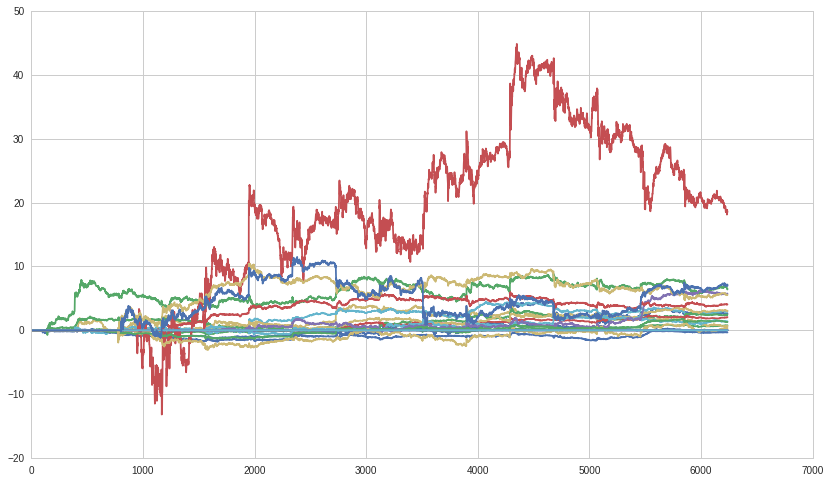

In [34]:
for i in range(x):
    stockChoice = priceRets[priceRets.index.get_level_values(1)==priceRets.index.get_level_values(1)[i]]
    stockChoice['priceDiff'] = stockChoice['price'].diff().shift(-1)
    plt.plot(np.cumsum(pd.Series(stockChoice['priceDiff']*stockChoice['sigF']).shift(1).dropna().values))

We want to compare the above strategy to one where we simply buy and hold. The below plot demonstrates our cumulative pnl for such a buy and hold strategy for each stock.

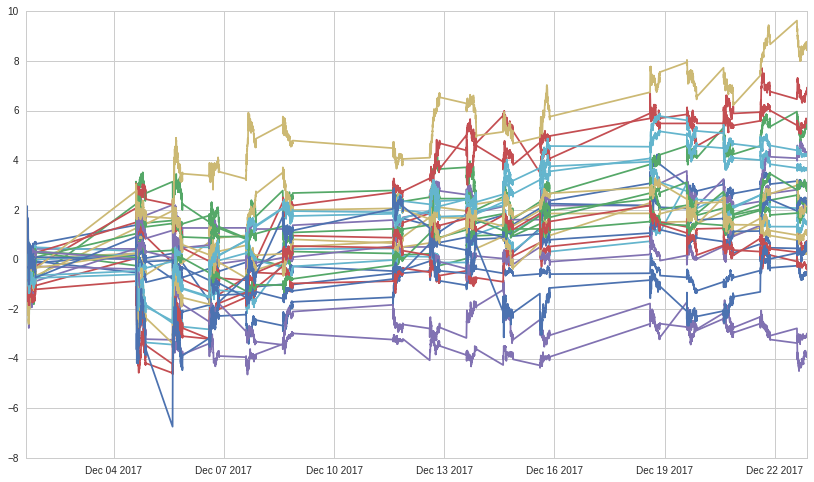

In [36]:
myStocks = get_stocks(x,d1)
for stock in myStocks:
    prices = get_pricing(stock,d1,d2,frequency=freq)
    plt.plot(np.cumsum(prices['price'].pct_change()*100))